In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate

Statistical Summary

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Detection/data/raw_data.csv')
print("Statistical Summary:\n", )
print(tabulate(data.describe(), headers='keys', tablefmt='fancy_grid'))

Statistical Summary:

╒═══════╤════════════╤═════════════╤═════════════╤════════════╤═══════════╤═════════════╤═════════════╤═══════════╤═════════════╤════════════╤═════════════╤═════════════╤════════════╤═════════════╕
│       │        age │         sex │          cp │   trestbps │      chol │         fbs │     restecg │   thalach │       exang │    oldpeak │       slope │          ca │       thal │      target │
╞═══════╪════════════╪═════════════╪═════════════╪════════════╪═══════════╪═════════════╪═════════════╪═══════════╪═════════════╪════════════╪═════════════╪═════════════╪════════════╪═════════════╡
│ count │ 1025       │ 1025        │ 1025        │  1025      │ 1025      │ 1025        │ 1024        │ 1025      │ 1025        │ 1023       │ 1025        │ 1025        │ 1025       │ 1025        │
├───────┼────────────┼─────────────┼─────────────┼────────────┼───────────┼─────────────┼─────────────┼───────────┼─────────────┼────────────┼─────────────┼─────────────┼────────────┼───

Correlation Heatmap

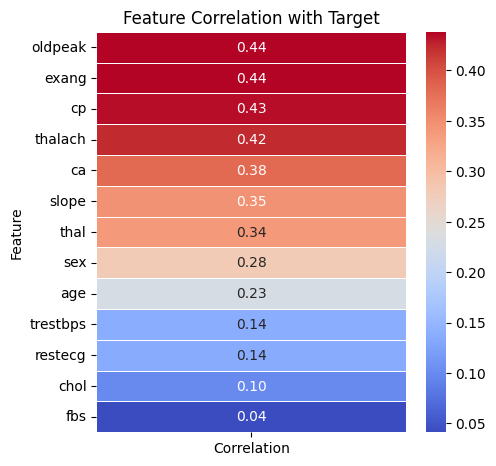

In [4]:
correlation = data.corr()['target'].drop('target').abs().sort_values(ascending=False)

corr_df = correlation.to_frame().reset_index()
corr_df.columns = ['Feature', 'Correlation']

plt.figure(figsize=(5, len(corr_df) * 0.4))
sns.heatmap(corr_df.set_index("Feature"), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation with Target")
plt.show()

Boxplots

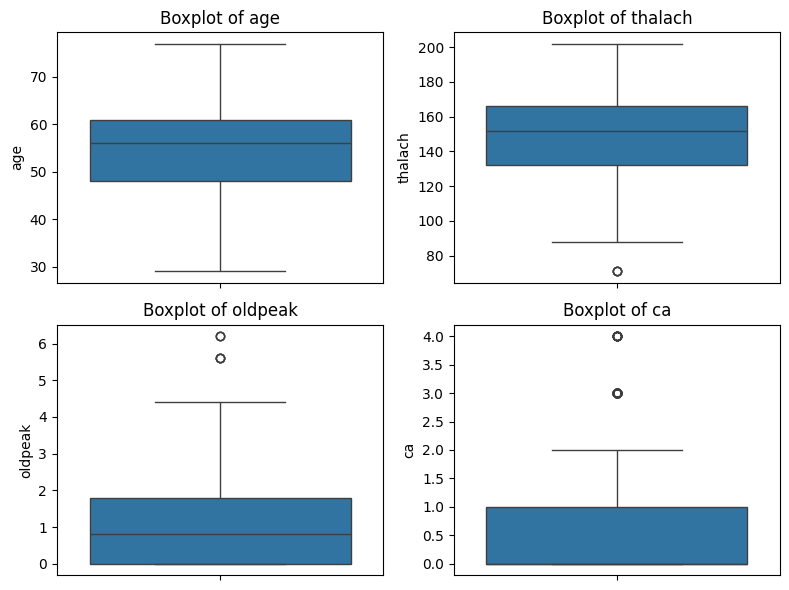

In [5]:
numerical_features = ["age", "thalach", "oldpeak", "ca"]

cols = 2
rows = math.ceil(4 / cols)
fig, axes = plt.subplots(rows, cols, figsize=(8, rows * 3))
axes = axes.flatten()

# Plot boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

Histograms

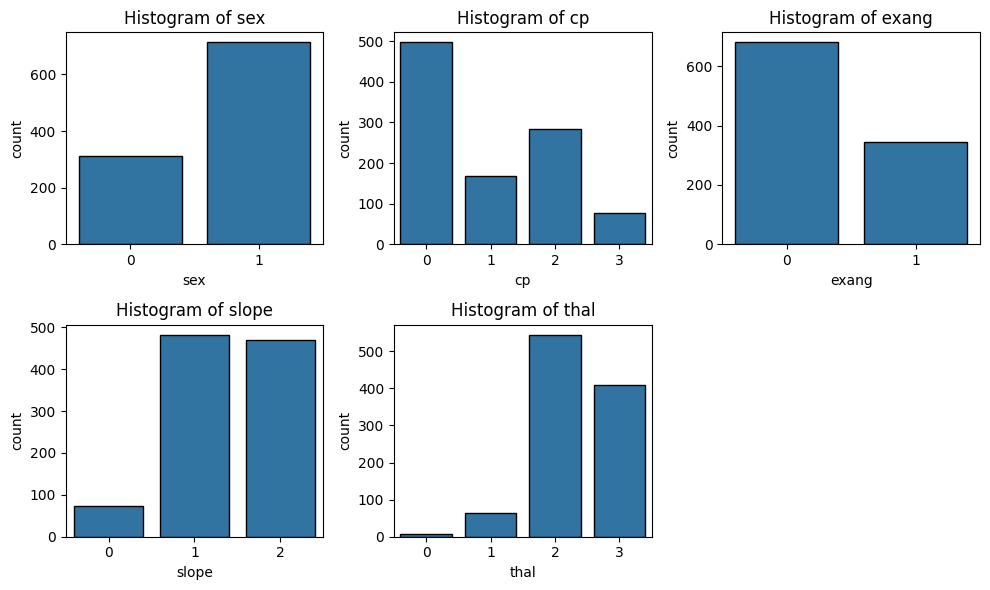

In [6]:
categorical_features = ["sex", "cp", "exang", "slope", "thal"]

cols = 3
rows = math.ceil(len(categorical_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Histogram of {feature}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()